#Data Modelling#

Import the required Python libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy import stats
import math

Mount drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load final_dataset which was obtained from data cleaning

In [ ]:
final_dataset=pd.read_csv('/content/drive/MyDrive/Data Analytics Club/CALCOFI regression analysis/final_dataset.csv')
final_dataset

,Unnamed: 0,Salinity,Temperature
0,0,0.001095,0.000999
1,1,0.001095,0.000995
2,2,0.001095,0.000995
3,3,0.001094,0.000994
4,4,0.001094,0.000994
...,...,...,...
814242,814242,0.001094,0.001783
814243,814243,0.001094,0.001783
814244,814244,0.001094,0.001778
814245,814245,0.001094,0.001727


Choose sample of data for better accuracy score

In [ ]:
final_dataset = final_dataset.sample(5000)
final_dataset

,Unnamed: 0,Salinity,Temperature
657839,657839,0.001122,0.000618
36284,36284,0.001097,0.001382
252808,252808,0.001115,0.001766
593180,593180,0.001095,0.001311
534786,534786,0.001093,0.001717
...,...,...,...
593849,593849,0.001116,0.000987
727924,727924,0.001094,0.001105
542058,542058,0.001098,0.001639
741536,741536,0.001121,0.000779


Split data in final_dataset into training and testing data

In [ ]:
x = np.array(final_dataset['Salinity']).reshape(-1, 1)
y = np.array(final_dataset['Temperature']).reshape(-1, 1)
x,y

(array([[0.00112175],
        [0.00109726],
        [0.00111491],
        ...,
        [0.00109768],
        [0.00112083],
        [0.00110934]]), array([[0.00061815],
        [0.0013818 ],
        [0.001766  ],
        ...,
        [0.00163857],
        [0.00077887],
        [0.00157295]]))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

#Linear Regression#

Fitting Linear Regression to the data

In [ ]:
linreg_model = LinearRegression()
linreg_model.fit(x_train,y_train)

LinearRegression()

Predict water temperature based on salinity

In [ ]:
y_pred = linreg_model.predict(x_test)                                    

Checking accuracy of linear regression model

In [ ]:
accuracy_score = linreg_model.score(x_test, y_test) 
print("Linear Regression Model Accuracy Score: " + "{:.3%}".format(accuracy_score))
print("Mean absolute error: %.8f" % np.mean(np.absolute(y_pred - y_test)))
print("Residual sum of squares (MSE): %.8f" % np.mean((y_pred - y_test) ** 2))
print("RMSE: %.8f" % np.sqrt(np.mean((y_pred - y_test) ** 2)))
print("R2-score: %.2f" % r2_score(y_pred , y_test))
print("Coefficients of the model:", linreg_model.coef_)
print("Intercept of the model: ", linreg_model.intercept_)

Linear Regression Model Accuracy Score: 30.361%
Mean absolute error: 0.00024227
Residual sum of squares (MSE): 0.00000010
RMSE: 0.00032348
R2-score: -1.68
Coefficients of the model: [[-13.64094001]]
Intercept of the model:  [0.01614541]


Visualisation of linear regression model obtained using scatter plot

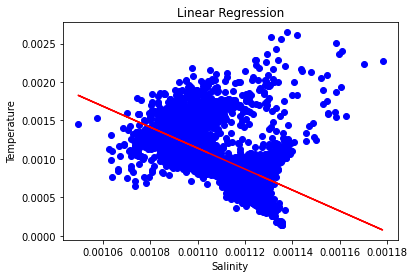

In [ ]:
# Visualising the Linear Regression results
plt.scatter(x_train, y_train, color = 'blue')
plt.plot(x_train, linreg_model.predict(x_train), color = 'red')
plt.title('Linear Regression')
plt.xlabel('Salinity')
plt.ylabel('Temperature')
plt.show()


#Polynomial Regression#

Fitting Polynomial Regression to the data

In [ ]:
polyreg_model = PolynomialFeatures(degree = 4)
transform_poly = polyreg_model.fit_transform(x_train)

linreg2 = LinearRegression()
linreg2.fit(transform_poly,y_train)

polynomial_predict = linreg2.predict(transform_poly)

Checking accuracy of Polynomial regression model

In [ ]:
rmse = np.sqrt(mean_squared_error(y_train,polynomial_predict))
r2 = r2_score(y_train,polynomial_predict)
print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.2}".format(r2))

RMSE Score for Test set: 0.00031
R2 Score for Test set: 0.41


Visualisation of polynomial regression model

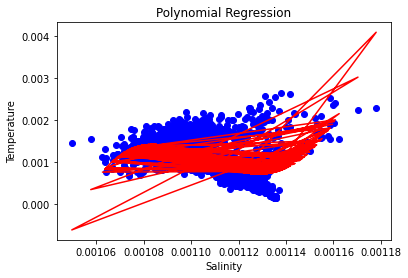

In [ ]:
# Visualising the Polynomial Regression results
plt.scatter(x_train, y_train, color = 'blue')
plt.plot(x_train, linreg2.predict(polyreg_model.fit_transform(x_train)), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('Salinity')
plt.ylabel('Temperature')
plt.show()

#Saving the models#

In [ ]:
import pickle

Pkl_Filename1 = "Linear_Regression_Model.pkl"  
with open(Pkl_Filename1, 'wb') as file:  
    pickle.dump(linreg_model, file)

Pkl_Filename2 = "Polynomial_Regression_Model.pkl"  
with open(Pkl_Filename2, 'wb') as file:  
    pickle.dump(polyreg_model, file)